<a href="https://colab.research.google.com/github/HadiElnemr/Machine-Learning-Tasks/blob/main/CNN_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
import numpy as  np
import matplotlib.pyplot as plt
from keras.datasets.fashion_mnist import load_data
import cv2
from cv2 import *
from keras.activations import relu, softmax, sigmoid
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import  to_categorical


In [ ]:
fashion_mnist_dict = {
  0:	'T-shirt/top',
  1:	'Trouser',
  2:	'Pullover',
  3:	'Dress',
  4:	'Coat',
  5:	'Sandal',
  6:	'Shirt',
  7:	'Sneaker',
  8:	'Bag',
  9:	"Ankle boot"
}

Getting data

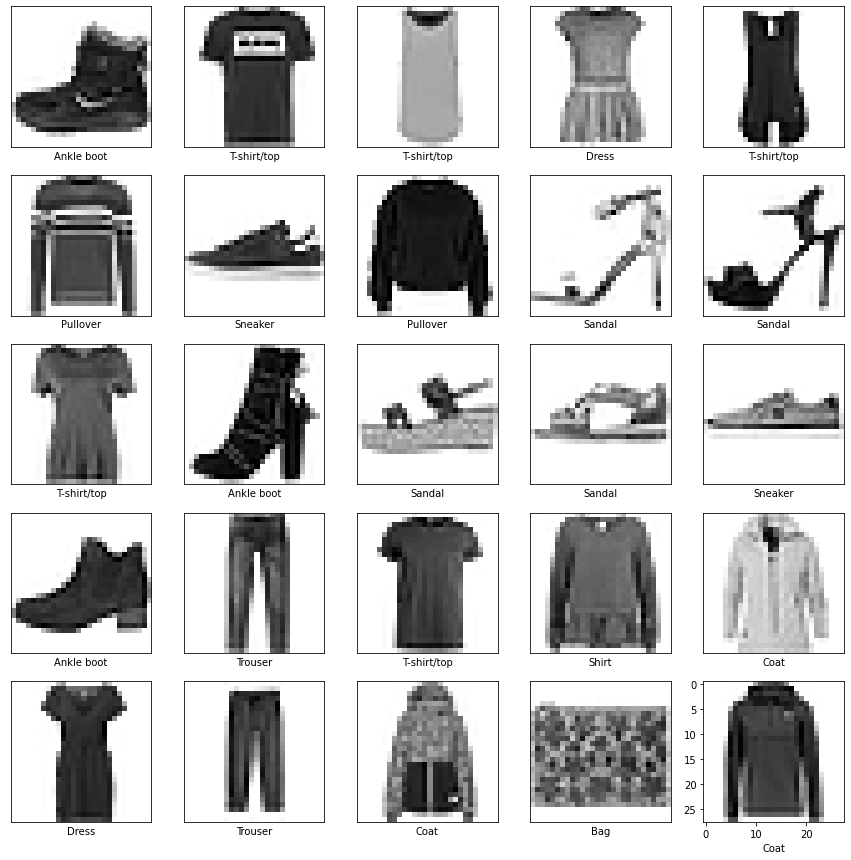

In [ ]:
(train_x,train_y),(test_x,test_y) = load_data()
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

plt.figure(figsize=(15,15))
for i in range(25):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5,5,i+1)
  plt.imshow(train_x[i],cmap=plt.cm.binary)
  plt.xlabel(fashion_mnist_dict.get(np.argmax(train_y[i])))
train_x = train_x.reshape(-1, 28, 28, 1)   # 1 for channels?!
test_x = test_x.reshape(-1, 28, 28, 1)


## Model

# Using Flatten and Dense Layers

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y, epochs = 10)
model.summary()

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.1237 - accuracy: 0.6749
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6397 - accuracy: 0.7675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5790 - accuracy: 0.7892
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5196 - accuracy: 0.8192
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5075 - accuracy: 0.8240
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.8252
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4906 - accuracy: 0.8352
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4815 - accuracy: 0.8352
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4709 - accuracy: 0.8380
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.455

In [ ]:
l,acc_train = model.evaluate(train_x, train_y)
l,acc_test = model.evaluate(test_x, test_y)
print(f'Train accuracy = {(int)(acc_train*100)}% \nTest accuracy = {(int)(acc_test*100)}%')

313/313 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.8231
Train accuracy = 84% 
Test accuracy = 82%


# Using Conv2D, MaxPool2D, Flatten and Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape = (28,28,1)  , activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x,train_y,epochs = 10)
model.summary()

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 6.6002 - accuracy: 0.7887
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3033 - accuracy: 0.8875
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2686 - accuracy: 0.8992
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2493 - accuracy: 0.9060
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2284 - accuracy: 0.9144
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2209 - accuracy: 0.9174
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1899 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1705 - accuracy: 0.9376
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1602 - accuracy: 0.9406
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [ ]:
l,acc_train = model.evaluate(train_x, train_y)
l,acc_test = model.evaluate(test_x, test_y)
print(f'Train accuracy = {(int)(acc_train*100)}% \nTest accuracy = {(int)(acc_test*100)}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.4901 - accuracy: 0.8824
Train accuracy = 95% 
Test accuracy = 88%


(1, 28, 28, 3)

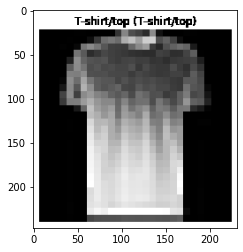

In [ ]:
# img = cv2.imread('sample_image.png')
# plt.imshow(img)
# img = cv2.resize(img, (28,28))
# img = np.expand_dims(img,0)
# img.shape

In [ ]:
# img_re = cv2.resize(img,(28,28))
# img_re = img_re.reshape(-1,28,28,1)
# img_re = np.d
# pred = model.predict(img_re)
# pclass = pred.argmax()
# pred
# # img_re[0]


# # print(fashion_mnist_dict.get(pclass))

array([[9.64082246e-17, 1.15322263e-22, 2.78552002e-14, 3.19304447e-20,
        2.51551472e-25, 7.19821721e-04, 1.05459605e-17, 7.92530824e-16,
        9.99280155e-01, 2.18028391e-21],
       [1.12786729e-05, 1.25088490e-21, 9.99988675e-01, 8.71198699e-30,
        2.03346742e-10, 6.19850094e-21, 9.81343045e-24, 1.59030317e-30,
        1.65086682e-16, 0.00000000e+00],
       [1.30557467e-08, 3.57769097e-26, 1.00000000e+00, 6.84554512e-25,
        6.21435410e-16, 5.76402037e-10, 1.80516821e-20, 5.53074096e-33,
        1.51060189e-11, 0.00000000e+00]], dtype=float32)